In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from model_vgg19 import Vgg19
from utils import ImageDataGenerator

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Parameters
train_layers = ["fc8"]
class_dic = {
    0: "bus",
    1: "dinosaurs",
    2: "elephants",
    3: "flowers",
    4: "hourse"
}

# Initialize model
vgg19 = Vgg19(num_classes=5, train_layers=train_layers, model="test")

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver(var_list=tf.global_variables())
model_file = tf.train.latest_checkpoint("./runs/vgg19/1544503031/ckpt/")
saver.restore(sess, model_file)

INFO:tensorflow:Restoring parameters from /data/repository/TT/TT/finetune_models_with_tfslim/runs/inceptionv2/1544503031/ckpt/model-2400


[[0.9611498  0.0115449  0.00577409 0.00704212 0.01448905]]


(-0.5, 383.5, 255.5, -0.5)

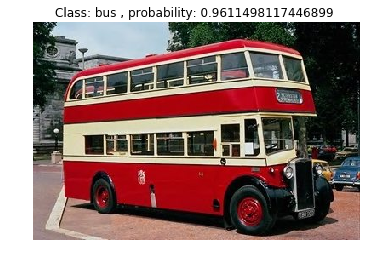

In [11]:
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)
img_origin = cv2.imread("./data/train/bus/372.jpg")
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
# Convert image to float32 and resize to (224x224)
img = cv2.resize(img_origin.astype(np.float32), (224, 224))
# Subtract the ImageNet mean
img -= imagenet_mean
# Reshape as needed to feed into model
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = img.reshape((1, 224, 224, 3))

probs = sess.run(vgg19.probability, feed_dict={vgg19.x_input: img,
                                               vgg19.keep_prob: 1.0
                                               }
                )

class_name = class_dic[np.argmax(probs)]
print(probs)
plt.imshow(img_origin)
plt.title("Class: {} , probability: {} ".format(class_name, probs[0, np.argmax(probs)]))
plt.axis('off')